# **Data analysis, classification and indexing**
## **Machine Learning**

In [1]:
import warnings
warnings.filterwarnings("ignore")


<hr>

### **Introduction**

In a sorting plant, we want to set up automated arms to sort clothes, shoes and accessories. The first step of the sorting consists in separating the accessories from the other objects. In order to realize a first demonstration, we are going to work on a simple data set: the `fashion_mnist` corpus from the `keras` module.

In [2]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools


<hr>

### **Data overview**

The corpus contains 60,000 images at 28 × 28 pixels in gray level. Each image represents a fashion item belonging to one of the 10 classes of clothing. The 10 classes are as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

We want to train a model that sorts images into two categories: **clothes** and **accessories**. In the clothing category, we'll have everything except bags (`8`) that are in the accessories category.

<hr>

### **Data loading**

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train's shape: ", X_train.shape)
print("X_test's shape ", X_test.shape)
print("y_train's classes: ", np.unique(y_train))
print("y_test's classes: ", np.unique(y_test))


2023-08-05 18:54:20.093601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train's shape:  (60000, 28, 28)
X_test's shape  (10000, 28, 28)
y_train's classes:  [0 1 2 3 4 5 6 7 8 9]
y_test's classes:  [0 1 2 3 4 5 6 7 8 9]


The following code draws a random image from the corpus, displays it, and gives the category of the outfit.

Image index:  9639
Image class:  3
Image shape:  (28, 28)


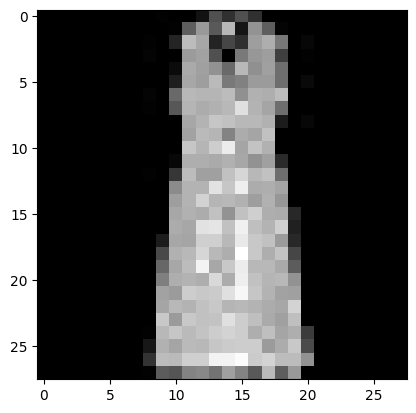

In [4]:
# Random selection of an index from 0 to 59999
index = np.random.randint(0, X_train.shape[0])

print("Image index: ", index)
print("Image class: ", y_train[index])
print("Image shape: ", X_train[index].shape)

plt.imshow(X_train[index], cmap=cm.gray)
plt.show()


By converting the training corpus into a `DataFrame` from the `pandas` module, we can indeed see that these images are of size 28 × 28, because we can see for each image 784 columns, representing the RGB value of each pixel.

In [5]:
# Converting X_train to a DataFrame object
X_train_df = pa.DataFrame(X_train.reshape(X_train.shape[0], -1))


In [6]:
X_train_df.head()  # Display of the pixel values of the first 5 images


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train_df.info()  # Displaying information on the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


Finally, this line of code allows you to check if there are any missing values in the corpus, in which case it would have removed the relevant images. However, this is not the case and you should see `False` as a result.

In [8]:
X_train_df.isnull().values.any()


False

Let's delete the `X_train_df` DataFrame to free the memory, as it is not useful anymore.

In [9]:
del X_train_df


<hr>

### **Corpus transformation**

We wish to transform the corpus so that it can be used by a classification model. To do so, we want to replace the labels of the basic corpus by the two classes defined earlier, i.e. **clothes** and **accessories**.

<div class="alert alert-block alert-warning">
    <b>Warning:</b> We have already done some processing on the corpus. At this point, it is imperative to reload the corpus because some memory and cache problems may occur.
</div>

In [10]:
# (Re)loading of data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# We transform the labels into two classes (0 or 1)
# If it is a garment then we put 0, otherwise we put 1
y_train = np.where(y_train == 8, 1, 0)
y_test = np.where(y_test == 8, 1, 0)

print("X_train's shape: ", X_train.shape)
print("y_train's classes: ", np.unique(y_train))
print("y_test's classes: ", np.unique(y_test))


X_train's shape:  (60000, 28, 28)
y_train's classes:  [0 1]
y_test's classes:  [0 1]


We will have to reload the corpus several times, so it is wise to create a function that will do it for us. We will not forget to mix the data each time.

In [11]:
def reload_and_transform_data():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # We transform the labels into two classes (0 or 1)
    y_train = np.where(y_train == 8, 1, 0)
    y_test = np.where(y_test == 8, 1, 0)
    # We mix training data
    shuffle = np.random.permutation(X_train.shape[0])
    X_train = X_train[shuffle]
    y_train = y_train[shuffle]
    return (X_train, y_train), (X_test, y_test)


The following code allows to visualize the first 50 images of the transformed corpus. We can see that the images are well classified in two categories. Classes appearing in blue are the ones that are more likely to be classified as an accessory, while classes appearing in black are the ones that are more likely to be classified as a clothing item.

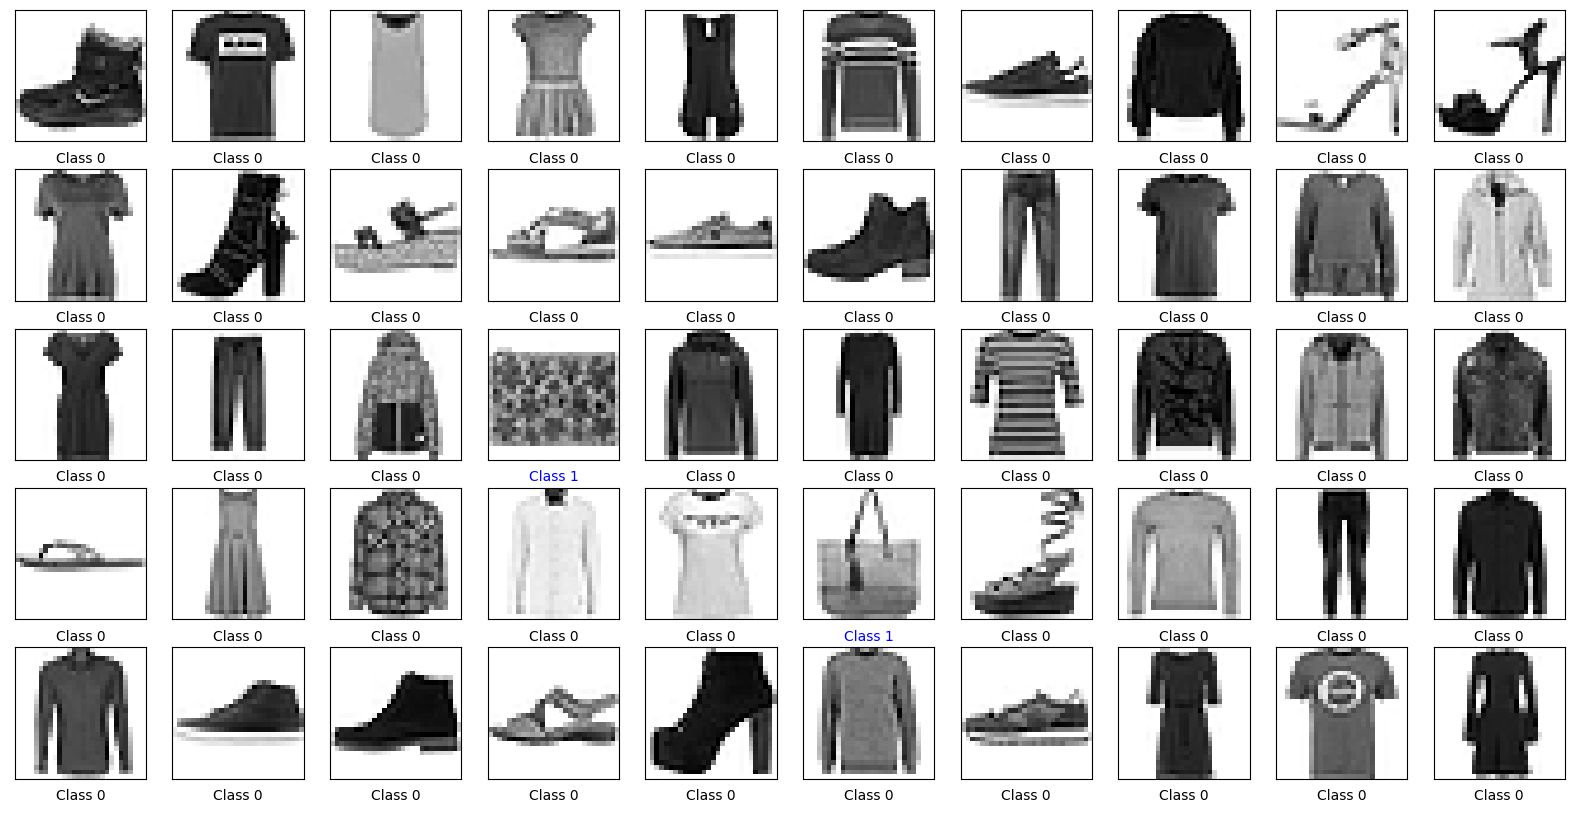

In [12]:
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel("Class " + str(y_train[i]),
               color='black' if y_train[i] == 0 else 'blue')
plt.show()


In [13]:
print("Percentage of images of class 0: ",
      (np.sum(y_train == 0) / y_train.shape[0]) * 100)
print("Percentage of images of class 1: ",
      (np.sum(y_train == 1) / y_train.shape[0]) * 100)


Percentage of images of class 0:  90.0
Percentage of images of class 1:  10.0


<hr>

### **Choice of classifiers**

We have thus succeeded in transforming the corpus into two categories. We still need to choose at least two classifiers to classify the images and compare their results, but which ones?

- **KNN** is a simple classification model that can be used to handle many types of data.
    - According to the course, it is a model without (hyper)parameters, which means that it has no assumptions about the shape of the data distribution. It is therefore very flexible and can be adapted to many types of data.
    - However, it can become slow when confronted with a large amount of data because of the many distance calculations it must perform.
    - It is also sensitive to outliers because it is based on the distance between points. However, this should not be a problem since, according to the `keras` documentation, the `fashion_mnist` images are normalized.
    - It is very easy to understand and explain, which makes it a good candidate for a first model.

<br>

- The **Naive Bayes classifier** is a probabilistic classification model, which is based on the application of Bayes theorem and thus the complementarity hypothesis. It is considered a good candidate for our second classification model for several reasons:
    - It is simple and easy to understand. It only uses the probabilities of the training data to predict the classes.
    - It is robust to noise and missing data because it uses the complementarity assumption to "fill in" missing data.
    - Although its results are often worse than those of other models because of its naive approach, it is very fast to train and to predict. This is a good point because we have a large amount of data.

<br>

I chose to not work with decision trees or random forests because they are slower to train and predict, and less simple to understand. It would have made sense to use convolutional neural networks, but that is not the purpose of this project.

<hr>

### **K Nearest Neighbors**

To begin, let's load the data. We use the `reload_and_transform_data` function created earlier.

In [14]:
(X_train, y_train), (X_test, y_test) = reload_and_transform_data()


Then, we create a `KNeighborsClassifier` model from the `sklearn` library with the parameter `n_neighbors` equal to 5. This is the number of neighbors (by default) that we will consider to predict the class of a new example. We will change it later when we look for an optimal `k`.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # Empty therefore equivalent to KNN with k=5
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)


KNeighborsClassifier()

<div class="alert alert-block alert-warning">
    <b>Warning:</b> The following instructions require a lot of computing time because the corpus is very large.
</div>

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm1 = confusion_matrix(y_test, knn.predict(
    X_test.reshape(X_test.shape[0], -1)))
print(cm1)


[[8979   21]
 [  50  950]]


In [17]:
acc1 = accuracy_score(y_test, knn.predict(X_test.reshape(X_test.shape[0], -1)))
print('Accuracy: {:.2f}%'.format(acc1*100))


Accuracy: 99.29%


We define a method to display graphically any confusion matrix.

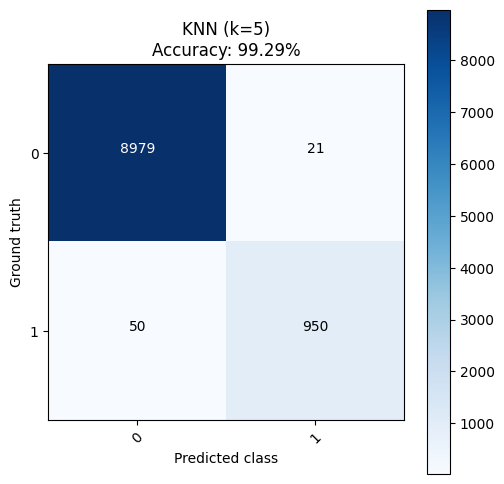

In [18]:
def plot_confusion_matrix(cm, title, acc):
    """
    cm: Confusion matrix
    title: Graph title
    acc: Accuracy
    """
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title + '\nAccuracy: {:.2f}%'.format(acc*100))
    plt.colorbar()

    tick_marks = np.arange(2)  # 2 classes
    plt.xticks(tick_marks, [0, 1], rotation=45)
    plt.yticks(tick_marks, [0, 1])

    fmt = 'd'  # Display of the confusion matrix in integer
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Ground truth')
    plt.xlabel('Predicted class')
    plt.show()


plot_confusion_matrix(cm1, 'KNN (k=5)', acc1)


Let's look for the best `k` to optimize this model for our dataset.

In [19]:
def best_model_search(X_train, X_test, y_train, y_test, n, patience):
    """
    X_train: Training data
    X_test: Test data
    y_train: Training labels
    y_test: Test labels
    n: Maximum number of neighbors to test
    patience: Number of times we can have a lower accuracy than the previous one
    """
    k = 1
    best_k = k
    best_acc = 0
    best_model = None
    p = patience

    while k < n and p > 0:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        print('k: ', k, '{:.2%}'.format(acc))

        if acc > best_acc:
            best_acc = acc
            best_model = knn
            best_k = k
            p = patience + 1

        p = p - 1
        k = k+1
    return best_model, best_k, best_acc


knn, k, acc = best_model_search(X_train.reshape(
    X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1), y_train, y_test, n=100, patience=5)


k:  1 99.41%
k:  2 99.18%
k:  3 99.32%
k:  4 99.30%
k:  5 99.29%
k:  6 99.23%


In [20]:
print("Found best k equal to :", k,
      "with an accuracy equal to", '{:.2%}'.format(acc))


Found best k equal to : 1 with an accuracy equal to 99.41%


We therefore restart a classification with `k` equal to 1.

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)

cm1 = confusion_matrix(y_test, knn.predict(
    X_test.reshape(X_test.shape[0], -1)))

print(cm1)


[[8983   17]
 [  42  958]]


In [22]:
acc1 = accuracy_score(y_test, knn.predict(X_test.reshape(X_test.shape[0], -1)))
print('Accuracy: {:.2f}%'.format(acc1*100))


Accuracy: 99.41%


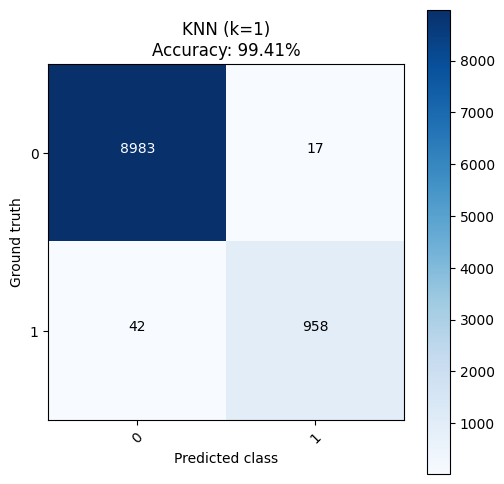

In [23]:
plot_confusion_matrix(cm1, 'KNN (k=1)', acc1)


<hr>

### **Naive Bayesian Classifier**

In [24]:
(X_train, y_train), (X_test, y_test) = reload_and_transform_data()


In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train.reshape(X_train.shape[0], -1), y_train)


GaussianNB()

In [26]:
y_pred = nb.predict(X_test.reshape(X_test.shape[0], -1))

cm2 = confusion_matrix(y_test, y_pred)
print(cm2)


[[8290  710]
 [ 238  762]]


In [27]:
acc2 = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc2*100))


Accuracy: 90.52%


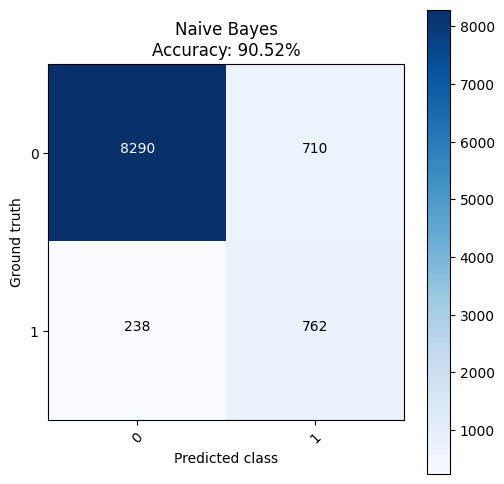

In [28]:
plot_confusion_matrix(cm2, 'Naive Bayes', acc2)


In [29]:
nb.get_params()


{'priors': None, 'var_smoothing': 1e-09}

<hr>

### **Dimension reduction by LDA**

The impact of dimension reduction has a significant impact on the classification of the new data.

- **Feasibility**:
    - Dimension reduction by LDA can make classification easier and faster, as it allows working with fewer features. This can be especially useful for high-dimensional datasets, where classification can be time-consuming and computationally expensive.

<br>

- **Quality**:
    - An LDA can improve the quality of the classification by preserving the discriminations between classes.
    - However, it is important to note that dimension reduction can also lead to a loss of information, which can negatively affect the quality of the classification.

<br>

- **Complexity**:
    - An LDA can also make the classification less complex by reducing the number of features.
    - Nevertheless, the computation of the dimension reduction can be quite complex and therefore costly in computation time.

<br>

In [30]:
(X_train, y_train), (X_test, y_test) = reload_and_transform_data()


We have only two classes, clothing and accessories, so `n_components` must be equal to 1.

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
model = lda.fit_transform(X_train, y_train)


Let's see the results before and after the dimension reduction.

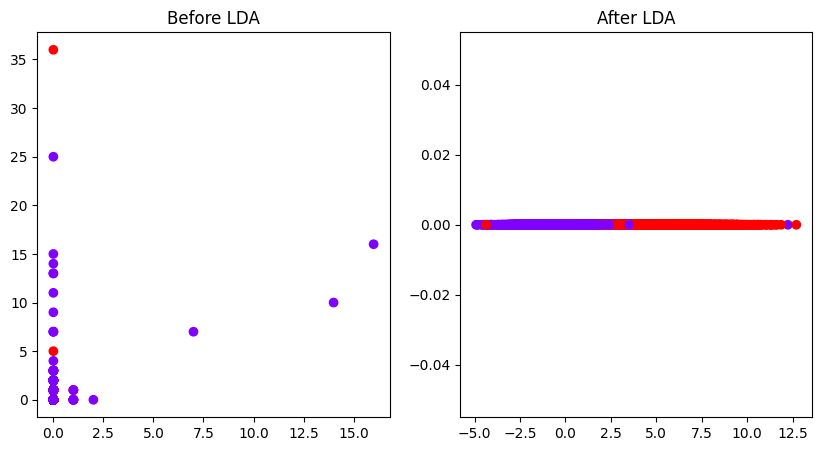

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.title('Before LDA')
plt.subplot(1, 2, 2)
plt.scatter(model[:, 0], np.zeros(len(model)), c=y_train, cmap='rainbow')
plt.title('After LDA')
plt.show()


Same visualization as before, but this time with the data at a different height according to their class, after dimension reduction.

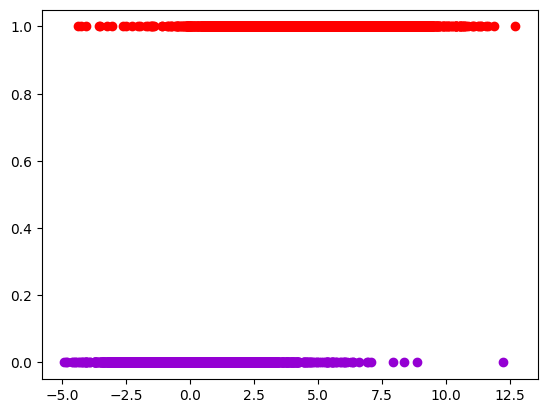

In [33]:
plt.scatter(model[y_train == 0, 0], np.zeros(
    model[y_train == 0].shape[0]), c='darkviolet')
plt.scatter(model[y_train == 1, 0], np.zeros(
    model[y_train == 1].shape[0]) + 1, c='r')
plt.show()


No need to call `explained_variance_ratio_` on the model since `n_components` is different from `None`.

In [34]:
y_pred = lda.predict(X_test)


In [35]:
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)


[[8940   60]
 [ 130  870]]


In [36]:
acc3 = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc3*100))


Accuracy: 98.10%


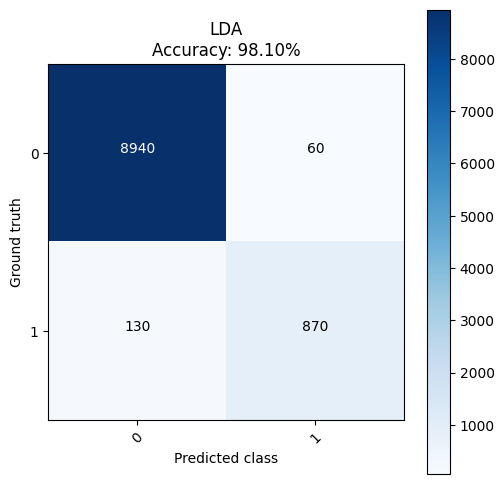

In [37]:
plot_confusion_matrix(cm3, 'LDA', acc3)


<hr>

### **Naive Bayesian Classifier with LDA**

In [38]:
(X_train, y_train), (X_test, y_test) = reload_and_transform_data()


In [39]:
# (Re)creation of the LDA model to avoid cache problems
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
model = lda.fit_transform(X_train, y_train)

nb = GaussianNB()
nb.fit(model, y_train)


GaussianNB()

In [40]:
y_pred = nb.predict(lda.transform(X_test))

cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


[[8867  133]
 [  68  932]]


In [41]:
acc4 = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc4*100))


Accuracy: 97.99%


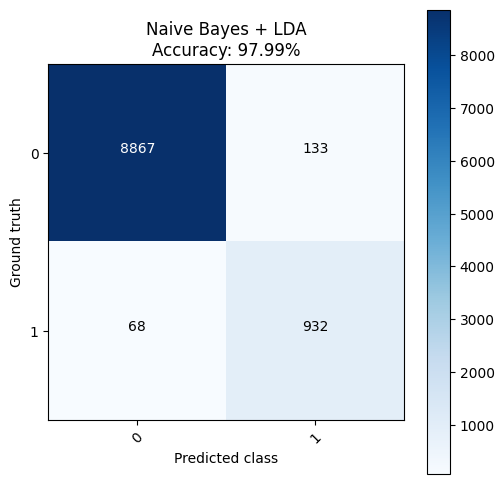

In [42]:
plot_confusion_matrix(cm4, 'Naive Bayes + LDA', acc4)


<hr>

### **KNN Classifier with LDA**

In [43]:
(X_train, y_train), (X_test, y_test) = reload_and_transform_data()


In [44]:
# (Re)creation of the LDA model to avoid cache problems
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
model = lda.fit_transform(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(model, y_train)


KNeighborsClassifier(n_neighbors=1)

In [45]:
y_pred = knn.predict(lda.transform(X_test))

cm5 = confusion_matrix(y_test, y_pred)
print(cm5)


[[8873  127]
 [ 132  868]]


In [46]:
acc5 = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc5*100))


Accuracy: 97.41%


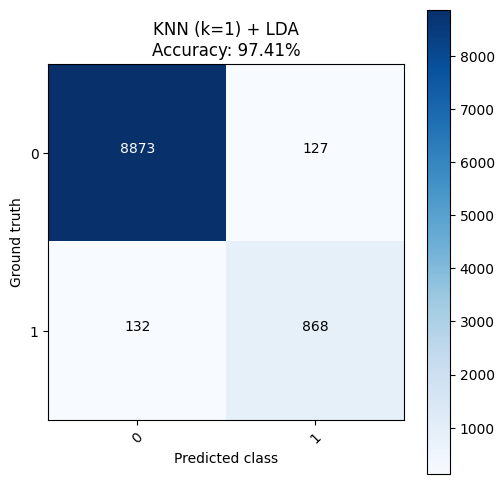

In [47]:
plot_confusion_matrix(cm5, 'KNN (k=1) + LDA', acc5)


<hr>

### **Conclusion**

First, let's display the results of the classifiers, from best to worst model.

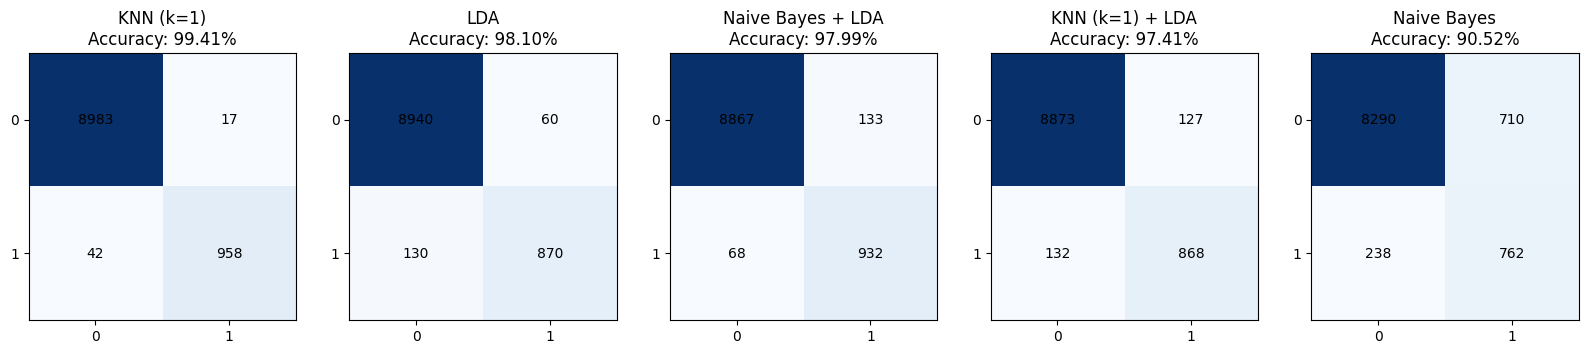

In [48]:
# List of confusion matrices
cm = [[cm1, 'KNN (k=1)'], [cm2, 'Naive Bayes'], [cm3, 'LDA'],
      [cm4, 'Naive Bayes + LDA'], [cm5, 'KNN (k=1) + LDA']]

# Sort the confusion matrices by decreasing order of precision
cm = sorted(cm, key=lambda x: x[0][0][0] + x[0][1][1], reverse=True)
titles = [x[1] for x in cm]
cm = [x[0] for x in cm]

# Display the confusion matrices
fig, axs = plt.subplots(1, len(cm), figsize=(20, 5))
for i in range(len(cm)):
    axs[i].imshow(cm[i], cmap='Blues')
    axs[i].set_title(titles[i] + '\nAccuracy: {:.2f}%'.format(
        (cm[i][0][0] + cm[i][1][1]) * 100 / np.sum(cm[i])))
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xticklabels(['0', '1'])
    axs[i].set_yticklabels(['0', '1'])
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, cm[i][j][k], ha='center', va='center')
plt.show()


<div class="alert alert-block alert-info">
<b>Note:</b> Numbers and percentages are probably different from those in the report because the Jupiter notebook was run several times.</div>

**Are the results obtained satisfactory?**

The confusion matrices presented here are based on the `fashion_mnist` dataset, where a binary classification was performed. Classes 0, 1, 2, 3, 4, 5, 6, 7 were considered as **Class 0** or clothing, and Class 8 was considered as **Class 1** or accessories. Among all the classifiers tested, the KNN model achieved the best performance with a very low error rate. It accurately predicted a high number of cases for both classes but made some errors as well. The linear discriminant analysis (LDA) also performed well, with a similar error rate to KNN. The combinations of Bayes with LDA and KNN with LDA yielded slightly higher error rates but stayed within an acceptable range. The Naive Bayes classifier obtained less accurate results with an accuracy of about 90%. Our results are therefore satisfactory, as they are all close to `100%` accuracy except perhaps for the Naive Bayes.

**How can these results be explained?**

The following are the different factors that could explain these results:

- **Complexity of the model:**
    - KNN is a relatively simple model, which works by comparing each new data item to all the data in the training set and predicting which class is most frequent among the `k` nearest neighbors.
    - The LDA is also a fairly simple model, which works by finding a linear combination of features that maximizes the separation between classes.
    - Naive Bayes models with or without LDA are more complex because they use additional probabilities and assumptions.
    - Thus, it is possible that the simpler models performed better on the `fashion_mnist` set.

<br>

- **Data quality:**
    - Data quality can have a significant impact on the performance of our models.
    - If the data contains too much noise or lacks relevant information for classification, the models may perform poorly.
    - In our case, the data seems to be of good quality, which explains the good results obtained.

<br>

- **Dataset size:**
    - The smaller the dataset, the less data the model has to learn from and the more likely it is to overlearn.
    - It is possible that the KNN performed better because as it is simpler, it is less likely to overlearn.

<br>

- **Model hyperparameters:**
    - Each model has parameters that control its behavior and that can be adjusted to improve its performance. If the parameters of the KNN and LDA models were better chosen than those of the other models, this could explain why they obtained better performances. 
        - For example, for KNN, we tried to optimize the number of neighbors `k` and the distance used to compute the distance between points. The metric used for KNN is the Euclidean distance, which is the most commonly used distance for numerical data.
        - We were not able to optimize the other models by the same amount so this may explain why they performed worse than KNN.

<br>